# Outliers

### Los outliers (también conocidos como valores atípicos o puntos atípicos) son observaciones o datos que se encuentran significativamente alejados de la mayoría de los demás datos en un conjunto. En otras palabras, son valores que son inusuales o extremos en comparación con el resto de los datos.

Se usarán los datasets Iris, Tips, Penguins que están disponible públicamente a través de bibliotecas como seaborn o sklearn.

In [ ]:
# Introducción
#### 0.1.1 - 2025 - 01 - 01
#### Dr. Marco Aceves 
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### de 0 a 100 en Inteligencia Artificial
#### 3.1. Manejo de Outliers

In [2]:
# Importar librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
# Se puede cargar a través de seaborn, que es una librería que incluye conjuntos de datos
#df = sns.load_dataset('iris')
#df = sns.load_dataset('tips')
df = sns.load_dataset('penguins')

## Tratamiento de valores faltantes
Comprobaremos si hay valores nulos o faltantes.

Además de que se hará una inspección de los valores.

In [3]:
#Inspección inicial de los datos
print("Primeras filas del dataset:")
print(df.head())  # Mostrar las primeras 5 filas

print("\nInformación del dataset (tipos de datos, valores nulos):")
print(df.info())  # Información sobre el conjunto de datos

print("\nEstadísticas descriptivas del dataset:")
print(df.describe())  # Estadísticas como la media, desviación estándar, min, max, etc.

#Detectar valores faltantes (Nulos)
print("\nValores faltantes en el dataset:")
print(df.isnull().sum())  # Número de valores nulos por columna

Primeras filas del dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Información del dataset (tipos de datos, valores nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm    

## Delimitación de los límites de los Cuartiles

Detecta outliers en todas las columnas numéricas de un DataFrame utilizando el método IQR (rango intercuartílico).

In [4]:
def check_outlier_limits(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
        Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior

        print(f"\nColumna: {column}")
        print(f"Q1 (25%): {Q1}")
        print(f"Q3 (75%): {Q3}")
        print(f"IQR: {IQR}")
        print(f"Límite inferior: {lower_bound}")
        print(f"Límite superior: {upper_bound}")

# Llamamos a la función para revisar los límites
check_outlier_limits(df)


Columna: bill_length_mm
Q1 (25%): 39.225
Q3 (75%): 48.5
IQR: 9.274999999999999
Límite inferior: 25.312500000000004
Límite superior: 62.412499999999994

Columna: bill_depth_mm
Q1 (25%): 15.6
Q3 (75%): 18.7
IQR: 3.0999999999999996
Límite inferior: 10.95
Límite superior: 23.349999999999998

Columna: flipper_length_mm
Q1 (25%): 190.0
Q3 (75%): 213.0
IQR: 23.0
Límite inferior: 155.5
Límite superior: 247.5

Columna: body_mass_g
Q1 (25%): 3550.0
Q3 (75%): 4750.0
IQR: 1200.0
Límite inferior: 1750.0
Límite superior: 6550.0


## Detección de Outliers usando IQR
### Usaremos el rango intercuartílico (IQR) para detectar outliers.

Detección de Outliers (IQR): Definimos una función detect_outliers() que detecta los outliers de cada columna numérica utilizando el método del rango intercuartílico (IQR). Los outliers son aquellos valores que están por debajo de
𝑄1 − 1.5 × 𝐼𝑄𝑅 o por encima de Q3 + 1.5 × IQR.

In [5]:
#Identificación de Outliers usando IQR
#Para detectar outliers, vamos a aplicar el método del Rango Intercuartílico (IQR)

#Definir función para detectar outliers
def detect_outliers(df):
    outliers = pd.DataFrame()  # DataFrame para almacenar los outliers
    for column in df.select_dtypes(include=[np.number]).columns:  # Sólo consideramos columnas numéricas
        Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
        Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior

        # Identificar outliers
        outliers_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers[column] = outliers_column[column]  # Guardamos los outliers de cada columna
    return outliers.dropna()  # Eliminamos filas sin outliers

# Detectar outliers en el dataset
outliers = detect_outliers(df)

## Visualización de los resultados
Visualización de outliers: Utilizamos boxplots para visualizar los outliers. Los puntos fuera de los "bigotes" del boxplot son considerados outliers.

Visualización de relaciones entre variables: Usamos pairplot para ver cómo las variables numéricas se relacionan entre sí, separadas por la variable categórica species.

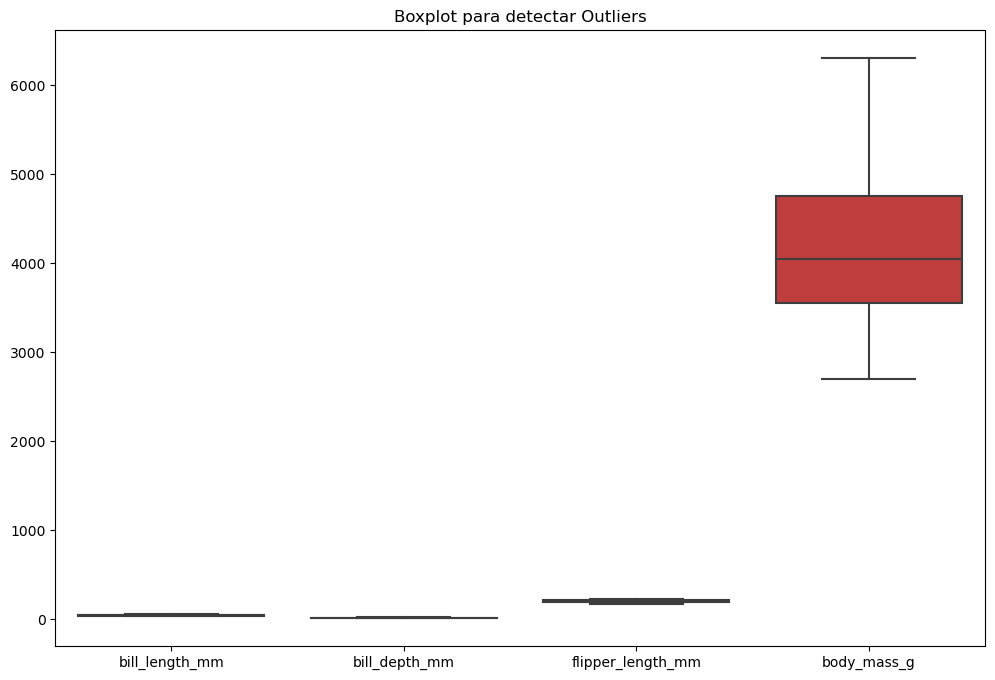

<Figure size 1200x800 with 0 Axes>

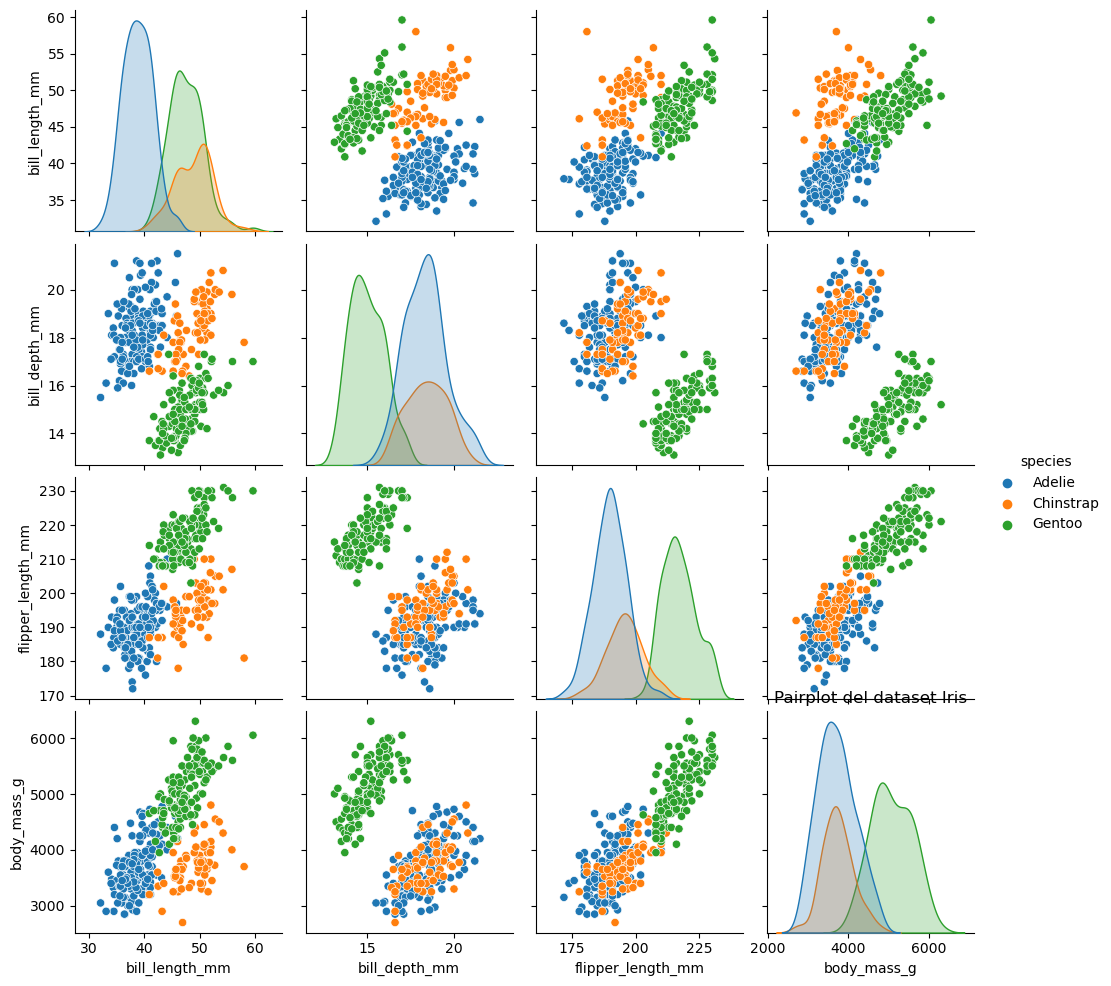

In [6]:
#Visualización de outliers (boxplot para cada variable numérica)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns='species'))  # Excluimos la columna 'species', que es categórica
plt.title('Boxplot para detectar Outliers')
plt.show()

#Visualización de las relaciones entre variables (scatterplot)
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species')  # Nos muestra las relaciones entre las variables numéricas agrupadas por especie
plt.title('Pairplot del dataset Iris')
plt.show()

## Eliminación de los outliers

Eliminación de outliers: Creamos un nuevo DataFrame sin los outliers. Para cada columna numérica, filtramos las filas que no cumplen con los límites del IQR.

In [7]:
#Eliminación o corrección de outliers
# Para este ejemplo, vamos a eliminar los outliers del dataframe original para fines de análisis posterior

# Eliminar filas con outliers en cualquier columna numérica
df_clean = df.copy()  # Hacemos una copia del dataframe original
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# Visualizar el dataframe limpio sin outliers
print("\nPrimeras filas del dataframe limpio (sin outliers):")
print(df_clean.head())


Primeras filas del dataframe limpio (sin outliers):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  
